# 3.1

텐서란 파이토치에서 사용되는 기본적인 자료구조로 N차원의 데이터라고 생각하면 된다. 다차원 배열이다.

# 3.2

#### Python list vs Tensor

- python list: 원소 하나하나 메모리에 따로따로 할당된다.
- Tensor: 파이썬 객체가 아니라 언박싱된 C언어의 숫자타입을 포함한 연속적인 메모리가 할당된다.

In [2]:
import torch
a=torch.ones(3) # 크기가 3인 1차원 텐서, 값은 모두 1로 채워져있다.
id(a[0]),id(a[1]) # 주소같음

(140450542114576, 140450542114576)

In [3]:
a=[1,2,3]
id(a[0]),id(a[1]) # 주소다름

(11256064, 11256096)

In [4]:
# 파이썬 리스트로 텐서만들고 차원확인
points=torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]])
print(points)
print(points.shape)

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
torch.Size([3, 2])


# 3.4
RGB인 3채널 이미지를 색상별 가중치에 따라 밝기값을 뽑아내 흑백으로 변환하기. 파이토치는 squeeze, unsqueeze, broadcasting등을 통해 유연한 텐서연산이 가능하다.

### squeeze vs unsqueeze

- squeeze: 특정 차원의 row가 1개일때 없애줌
- unsqueeze: 특정 차원에 row를 1개 생성해줌

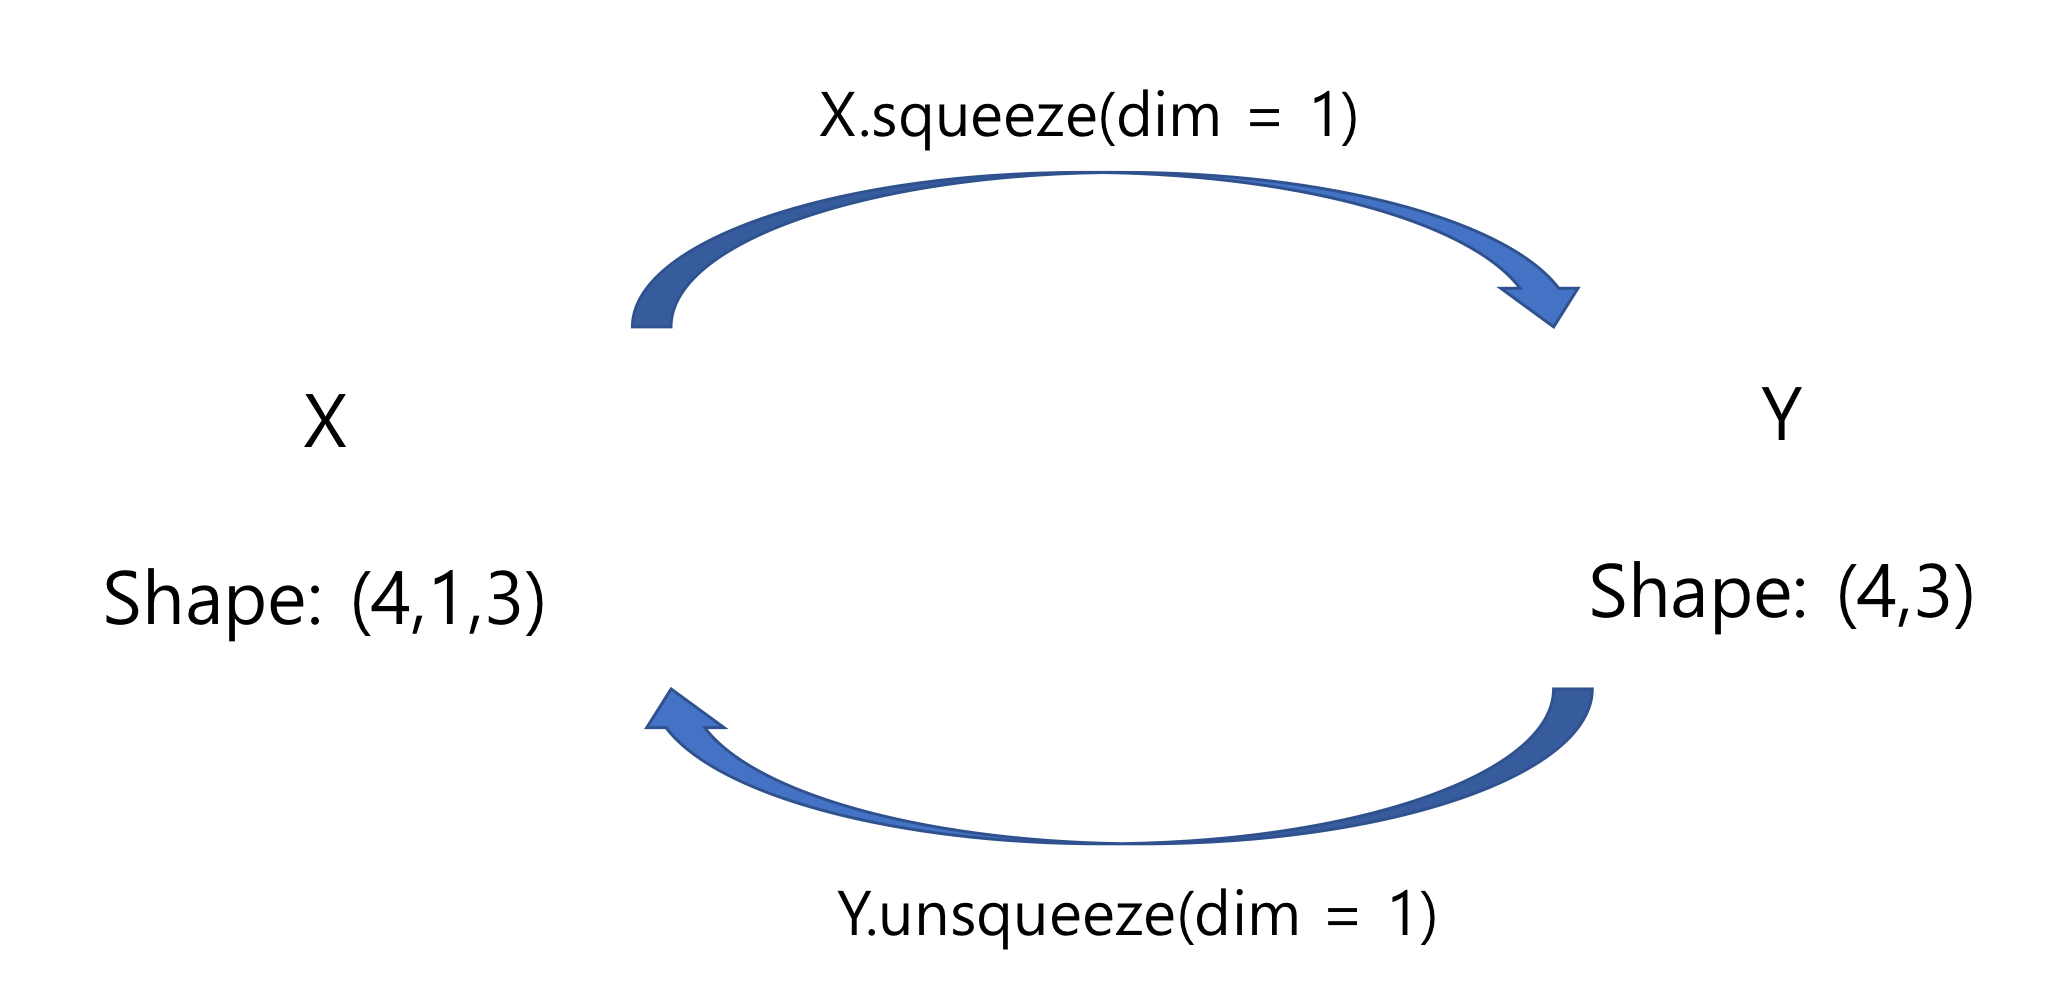

### broadcasting

텐서는 동일한 차원, 각 차원의 길이가 1일때, 브로드캐스팅이 가능할 경우에만 연산이 가능하다.

브로드캐스팅은 길이가 1인 차원을 알아서 늘려주어서 동일한 차원처럼 취급하는 것이다.

예를들어, X의 차원이 2x3x3이면 아래는 브로드캐스팅이 가능해 X와 Y의 텐서연산이 되는경우이다.
- Y=1x1x3
- Y=1x3
- Y=3

=> 뒤에서부터 다른 데 존재하지 않거나 1이면 가능

In [5]:
img_t=torch.randn(3,5,5) #(채널, 행, 열)
batch_t=torch.randn(2,3,5,5) #(배치크기, 채널, 행, 열)
weights=torch.tensor([0.2126,0.7152,0.0722])

#두경우 모두 뒤에서 세번째차원이 RGB임
img_gray=img_t.mean(-3)
batch_gray=batch_t.mean(-3)
img_gray.shape,batch_gray.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

함수 뒤에 _는 반환된 결과 적용시킬지 말지 결정

In [50]:
weights.unsqueeze(-1)
weights

tensor([[0.2126],
        [0.7152],
        [0.0722]])

In [49]:
weights.unsqueeze_(-1)
weights

tensor([[0.2126],
        [0.7152],
        [0.0722]])

In [6]:
unsqueezed_weights=weights.unsqueeze(-1).unsqueeze_(-1) #shape: [3, 1, 1]
img_weights=(img_t*unsqueezed_weights) # [3,5,5] * [3,1,1]
batch_weights=(batch_t*unsqueezed_weights) # [2,3,5,5] * [3,1,1]
img_gray_weighted=img_weights.sum(-3)
batch_gray_weighted=batch_weights.sum(-3)
img_gray_weighted.shape,batch_gray_weighted.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

In [7]:
#이름 지정이 가능한 텐서등장
weights_named=torch.tensor([0.2126,0.7152,0.0722],names=['channels'])
weights_named

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1405.)
  


tensor([0.2126, 0.7152, 0.0722], names=('channels',))

In [8]:
#refine_names함수를 사용하면 만들어 놓은 텐서에서 이름 지정가능
#...인 생략부호를 사용해 다른 차원은 건들이지 않는다.
img_named =  img_t.refine_names(..., 'channels', 'rows', 'columns')
batch_named = batch_t.refine_names(..., 'channels', 'rows', 'columns')
print("img named:", img_named.shape, img_named.names)
print("batch named:", batch_named.shape, batch_named.names)

img named: torch.Size([3, 5, 5]) ('channels', 'rows', 'columns')
batch named: torch.Size([2, 3, 5, 5]) (None, 'channels', 'rows', 'columns')


In [10]:
#align_as함수는 빠진 차원을 채워주고 존재하는 차원을 올바른 순서로 바꿔준다.
weights_aligned=weights_named.align_as(img_named)
weights_aligned

tensor([[[0.2126]],

        [[0.7152]],

        [[0.0722]]], names=('channels', 'rows', 'columns'))

In [13]:
#이름사용해서 연산가능
gray_named = (img_named * weights_aligned).sum('channels')
gray_named.shape, gray_named.names
img_named * weights_aligned

tensor([[[ 0.2518, -0.0939, -0.5945,  0.2266,  0.1452],
         [ 0.3375, -0.2691, -0.0387, -0.1437,  0.1660],
         [-0.1344,  0.1155,  0.2402,  0.0175, -0.1879],
         [ 0.3323, -0.2106,  0.4431,  0.0021,  0.1147],
         [ 0.2305, -0.3995, -0.0738, -0.0600,  0.4580]],

        [[ 0.7400,  0.1254, -0.6511,  0.0804,  0.0597],
         [ 1.3957,  0.7272,  0.8303,  0.5093,  0.5576],
         [ 0.4072,  1.0578,  1.0717,  0.1901, -1.3434],
         [ 0.5275,  0.7701,  1.2561, -0.2039, -0.6753],
         [ 1.4606,  0.1639, -0.2503, -0.0393, -0.4221]],

        [[-0.1487, -0.0539,  0.0229,  0.0650,  0.0876],
         [-0.0263,  0.0271, -0.0378,  0.1018, -0.0050],
         [ 0.1876,  0.0154, -0.0500, -0.1347, -0.1337],
         [ 0.1663,  0.1952, -0.1125,  0.0023,  0.0830],
         [ 0.0174, -0.0430, -0.0339,  0.0373, -0.0532]]],
       names=('channels', 'rows', 'columns'))

In [14]:
#이름없는 텐서로 변경
gray_plain = gray_named.rename(None)
gray_plain.shape, gray_plain.names

(torch.Size([5, 5]), (None, None))

#3.5
데이터과학 라이브러리는 효율성을 위해 넘파이에 의존하거나 파이토치 텐서같이 전용데이터 구조를 만든 후 숫자 데이터는 저수준 언어로 구현

### dtype 종류
- torch.float
- torch.int:
- torch.uint
- torch.bool

기본데이터 타입은 32비트 부동소수점

In [15]:
double_points = torch.ones(10, 2, dtype=torch.double)
short_points = torch.tensor([[1, 2], [3, 4]], dtype=torch.short)

In [16]:
short_points.dtype

torch.int16

In [ ]:
#캐스팅 메소드를 사용해 변환가능, to메소드를 사용해도 가능하다.
double_points = torch.zeros(10, 2).double() # torch.zeros(10, 2).to(torch.double)
short_points = torch.ones(10, 2).short() # torch.zeros(10, 2).to(dtype=torch.short)

# 3.6 
텐서를 다루는 다양한 텐서연산들 있다. 

온라인 문서참고 http://pytorch.org/docs

# 3.7

텐서 내부값은 실제로는 torch.Storage 인스턴스로 관리하며 연속적인 메모리 조각으로 할당된 상태이다.
저장공간은 숫자데이터를 가진 1차원 배열이다. 숫자들이 연속해서 들어있는 메모리 블럭으로 보면 되고, 파이토치의 Tensor객체는 이런 저장공간을 나타내는 Storage객체에 대한 뷰 역할을 담당하고 오프셋을 사용해서 공간의 임의 위치에 접근하거나 특정 차원의 크기를 단위로 해서 접근가능하다. 

1차원으로 구성되어있고 오프셋을 통한 뷰역할이므로 서로다른방식으로 구성된 텐서가 동일한 메모리공간을 가리키는것도 가능하다.

In [23]:
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points.storage() #1차원 배열, 크기가 6인 배열공간임.

 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage._TypedStorage(dtype=torch.float32, device=cpu) of size 6]

In [24]:
#따라서 텐서가 아닌 저장공간을 접근해서 값을 바꾸는것도 가능
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
points_storage = points.storage()
points_storage[0] = 2.0
points

tensor([[2., 1.],
        [5., 3.],
        [2., 1.]])

# 3.8
### 텐서의 메타데이터

저장공간을 인덱스로 접근하기 위해 텐서는 저장공간에 포함된 몇가지 정보에 의존한다.

- 사이즈: shape
- 오프셋: 텐서의 첫번째 요소를 가라키는 인덱스
- 스트라이드: 다음요소를 가리킬때 몇개의 요소를 건너뛰는지

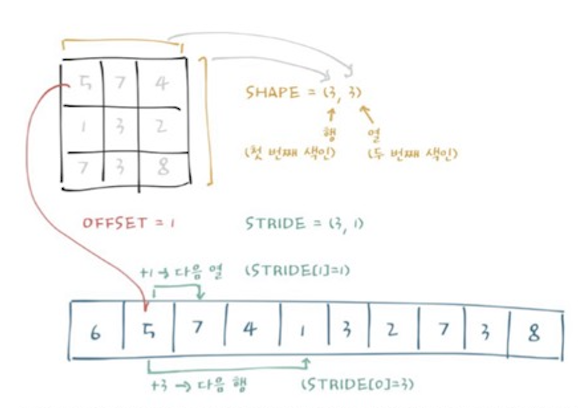

# 3.9

# 3.10

- 넘파이로 바꾸기:tensor.numpy()
- 텐서로 바꾸기:torch.from_numpy(tensor)

In [20]:
points = torch.ones(3, 4)
points_np = points.numpy()
points_np

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [21]:
points = torch.from_numpy(points_np)

In [22]:
points

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

# 3.11

# 3.12